In [40]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import sys
from PIL import Image
import matplotlib.pyplot as plt

In [41]:
# Añadimos al path el directorio con las fotos y el archivo de texto
sys.path.append('D:/Documents/Estudios/TFG/TFG_Panel_Dust_Recognition/Codigos_PC/Reconocimiento_Diagnostico/Archivos')
sys.path.append('D:/Documents/Estudios/TFG/TFG_Panel_Dust_Recognition/Codigos_PC/Reconocimiento_Diagnostico/Archivos/fotos')

In [42]:
model_path = 'D:/Documents/Estudios/TFG/TFG_Panel_Dust_Recognition/Codigos_PC/Reconocimiento_Diagnostico/panel_dirt_recognition_model.keras'
model = load_model(model_path)

In [43]:
# Leer el archivo .txt y extraer los datos necesarios
directorios=[]
file_path = 'D:/Documents/Estudios/TFG/TFG_Panel_Dust_Recognition/Codigos_PC/Reconocimiento_Diagnostico/Archivos/Datos_Placas.txt'
try:
    with open(file_path, 'r') as file:
        for linea in file:
            try:
                # Se parte el archivo en la coma y se guardan los datos
                partes=linea.strip().split(',')
                # Se guarda el directorio de la foto
                directorio=(partes[3])
                directorios.append(directorio)
                print("Se extrayeron los directorios")
            except ValueError as ve:
                print("Error al coger los directorios")
                print(f'Detalles del error: {ve}')
except FileNotFoundError:
    print('no se encontró el archivo')
except Exception as e:
    print(f'Ocurrió un error: {e}')

Se extrayeron los directorios
Se extrayeron los directorios
Se extrayeron los directorios
Se extrayeron los directorios
Se extrayeron los directorios
Se extrayeron los directorios
Se extrayeron los directorios
Se extrayeron los directorios


In [44]:
estados_predichos=[]
image_height=224
image_width=224

for dir in directorios:
    img_path = dir 
    img = image.load_img(img_path, target_size=(image_height, image_width))
    # Convertir la imagen a un array numpy
    img_array = image.img_to_array(img)

    # Expandir las dimensiones de la imagen para que coincida con el modelo (añadir una dimensión extra)
    img_array = np.expand_dims(img_array, axis=0)

    # Normalizar los valores de los píxeles de la imagen (opcional, dependiendo de cómo se haya entrenado el modelo)
    img_array = img_array / 255.0

    prediction = model.predict(img_array)
    if prediction < 0.5:
        estado=0
    else:
        estado=1
    estados_predichos.append(estado)
    


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


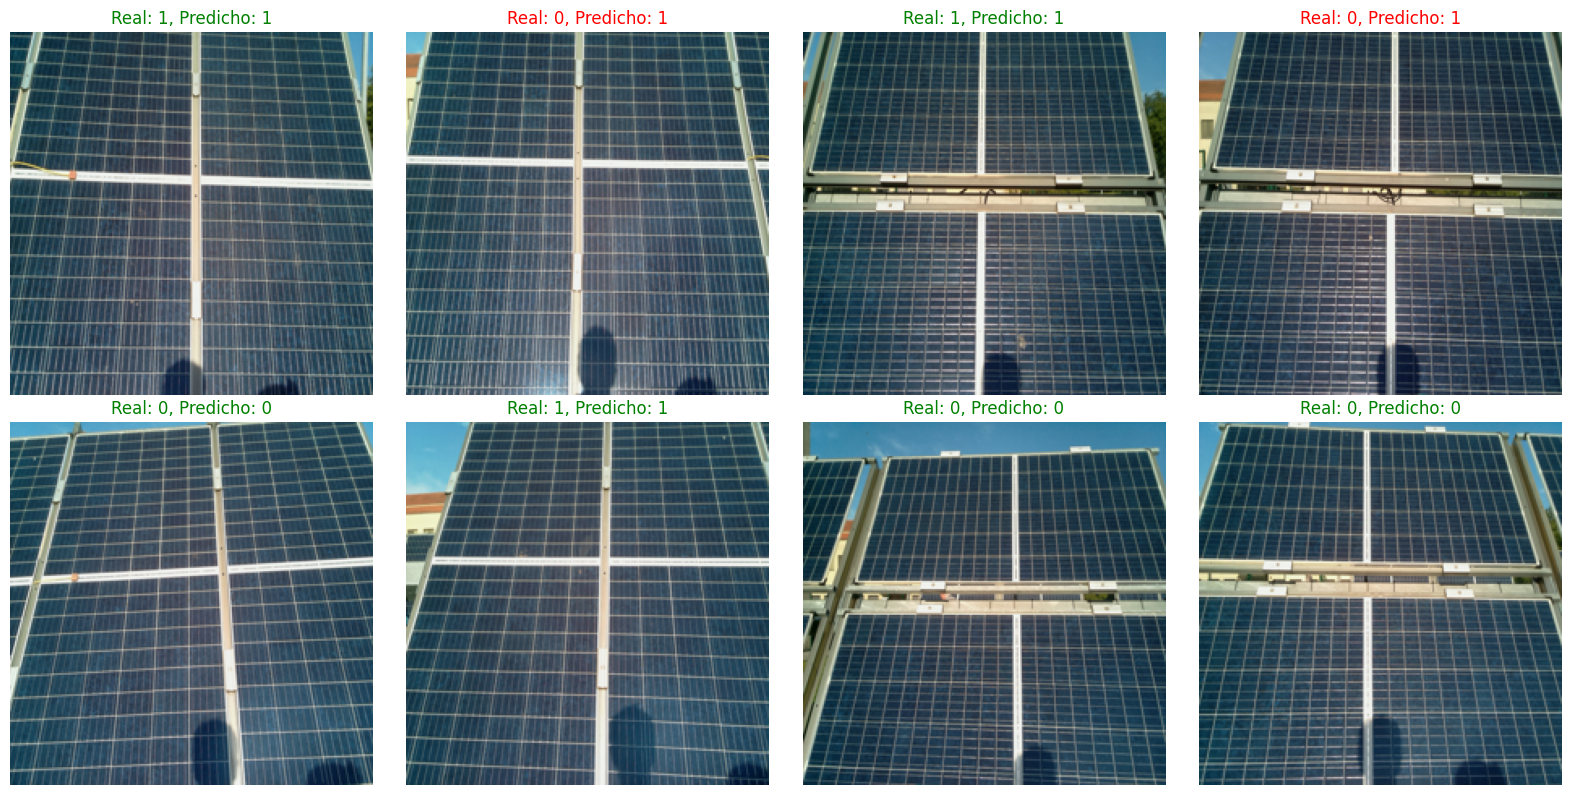

In [45]:
estados_reales = [1, 0, 1, 0, 0, 1, 0, 0]

# Crear una figura para mostrar las imágenes
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Procesar las primeras 8 imágenes
for i, ax in enumerate(axes.flatten()):
    if i >= len(directorios):
        break
    img_path = str(directorios[i])
    img = image.load_img(img_path, target_size=(image_height, image_width))
    
    # Convertir la imagen a un objeto PIL para poder rotarla
    img = Image.open(img_path).resize((image_height, image_width)).rotate(180)
    
    # Convertir la imagen a un array numpy para mostrarla con imshow
    img_array = np.array(img)
    
    # Determinar el color del título
    if estados_reales[i] == estados_predichos[i]:
        title_color = 'green'
    else:
        title_color = 'red'
    
    # Mostrar la imagen en la figura
    ax.imshow(img_array)
    ax.axis('off')
    ax.set_title(f'Real: {estados_reales[i]}, Predicho: {estados_predichos[i]}', color=title_color)

# Mostrar la figura
plt.tight_layout()
plt.show()

In [46]:
# Ruta del archivo nuevo
file_entrada = 'D:/Documents/Estudios/TFG/TFG_Panel_Dust_Recognition/Codigos_PC/Reconocimiento_Diagnostico/Archivos/Datos_Placas_clasificados.txt'

# Leer el archivo original y añadir la cuarta columna con los estados
try:
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    with open(file_entrada, 'w') as new_file:
        for i, line in enumerate(lines):
            line = line.strip()  # Eliminar saltos de línea
            new_line = f"{line},{estados[i]}\n"  # Añadir el estado como cuarta columna
            new_file.write(new_line)
    
    print("Archivo actualizado con la cuarta columna de estados.")
except FileNotFoundError:
    print('No se encontró el archivo original')
except Exception as e:
    print(f'Ocurrió un error: {e}')

Archivo actualizado con la cuarta columna de estados.


In [47]:
file_kml = 'D:/Documents/Estudios/TFG/TFG_Panel_Dust_Recognition/Codigos_PC/Reconocimiento_Diagnostico/Archivos/Datos_Placas.kml'

def generar_kml(coordenadas, output_file):
    kml = [
        '<?xml version="1.0" encoding="UTF-8"?>',
        '<kml xmlns="http://www.opengis.net/kml/2.2">',
        '<Document>',
        '<name>Coordenadas</name>',
        '<description>Coordenadas desde el archivo de texto con pines de colores en función del estado de las placas</description>',
    ]

    # Definir estilos para los pines de colores
    estilos = {
        '1': {
            'id': 'redPin',
            'icon': 'http://maps.google.com/mapfiles/kml/pushpin/red-pushpin.png'
        },
        '0': {
            'id': 'greenPin',
            'icon': 'http://maps.google.com/mapfiles/kml/pushpin/grn-pushpin.png'
        }
    }

    for key, style in estilos.items():
        kml.extend([
            f'<Style id="{style["id"]}">',
            '<IconStyle>',
            '<scale>1.1</scale>',
            f'<Icon><href>{style["icon"]}</href></Icon>',
            '<hotSpot x="20" y="2" xunits="pixels" yunits="pixels"/>',
            '</IconStyle>',
            '</Style>'
        ])

    for placa, lat, lon, estado in coordenadas:
        color_key = str(estado)
        kml.append('<Placemark>')
        kml.append(f'<name>{placa}</name>')
        kml.append(f'<styleUrl>#{estilos[color_key]["id"]}</styleUrl>')
        kml.append('<Point>')
        kml.append(f'<coordinates>{lon},{lat},0</coordinates>')
        kml.append('</Point>')
        kml.append('</Placemark>')

    kml.append('</Document>')
    kml.append('</kml>')

    with open(output_file, 'w') as file:
        file.write('\n'.join(kml))

def COORDtoKML(input_file, output_file):
    datos = []
    try:
        with open(input_file, 'r') as file:
            for linea in file:
                try:
                    partes = linea.strip().split(',')
                    # Extraer el nombre de la placa, segundo, tercer y quinto dato
                    dato = (partes[0], float(partes[1]), float(partes[2]), int(partes[4]))
                    # Agregar el dato a la lista
                    datos.append(dato)
                except ValueError as ve:
                    print(f"Error de formato en la línea: {linea.strip()}")
                    print(f"Detalles del error: {ve}")
    except FileNotFoundError:
        print(f"El archivo '{input_file}' no se encontró.")
    except Exception as e:
        print(f"Ocurrió un error: {e}")
    generar_kml(datos, output_file)

COORDtoKML(file_entrada, file_kml)